In [48]:
!pip install tensorflow_decision_forests


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import pandas as pd
import tensorflow as tf
import numpy as np
import tensorflow_decision_forests as  tfdf
import sklearn


In [50]:
pd.read_csv("Boston.csv")

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [51]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [52]:
data = pd.read_csv('Boston.csv', header=None, names=column_names)

In [53]:
data = data.iloc[1:,:]

In [24]:
import pandas as pd
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [25]:
y = np.array(df.iloc[1:, -1]).astype("float32")

In [26]:
x = np.array(df.iloc[1:,:-1]).astype("float32")

In [11]:
# x = np.transpose(x)

In [27]:
x.shape

(505, 13)

In [28]:
y.shape

(505,)

In [29]:
model = tfdf.keras.RandomForestModel()
model.fit(x,y)

Use /tmp/tmpuqqs78az as temporary training directory
Reading training dataset...
Training dataset read in 0:00:04.992349. Found 505 examples.
Training model...
Model trained in 0:00:00.119739
Compiling model...


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


In [30]:
model.save("boston")

In [31]:
model.evaluate(x[0][np.newaxis])

1/1 [==============================] - 0s 252ms/step - loss: 0.0000e+00


0.0

In [32]:
x.shape

(505, 13)

In [33]:
y.shape

(505,)

In [34]:
x[0][np.newaxis].shape

(1, 13)

In [35]:
from tensorflow.keras.layers import Dense, LSTM, Input, Lambda

In [36]:
model = tf.keras.Sequential([
    Input(shape=(13,)),
    Lambda(lambda x: tf.expand_dims(x, axis=1)),
    tf.keras.layers.Bidirectional(LSTM(150)),
    Dense(1)
])

In [37]:
model.compile(loss=tf.keras.losses.mse, optimizer = tf.keras.optimizers.SGD())

In [38]:
history = model.fit(x,y, epochs=30)

Epoch 1/30
16/16 [==============================] - 9s 6ms/step - loss: 0.1735
Epoch 2/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0894
Epoch 3/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0595
Epoch 4/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0487
Epoch 5/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0445
Epoch 6/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0425
Epoch 7/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0414
Epoch 8/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0406
Epoch 9/30
16/16 [==============================] - 0s 6ms/step - loss: 0.0399
Epoch 10/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0392
Epoch 11/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0387
Epoch 12/30
16/16 [==============================] - 0s 5ms/step - loss: 0.0381
Epoch 13/30
16/16 [==============================

In [ ]:
# learning_sc = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1*(10**-(epoch/20)))

In [ ]:
model.save("model.h5")

<Axes: >

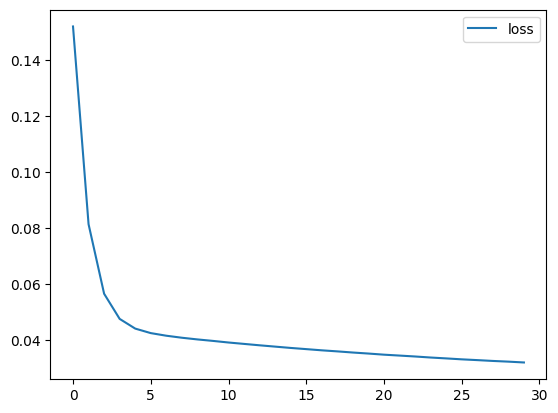

In [ ]:
pd.DataFrame(history.history).plot()

In [39]:
model.predict(x[0][np.newaxis])

1/1 [==============================] - 1s 661ms/step


array([[0.42107427]], dtype=float32)

In [40]:
import matplotlib.pyplot as plt


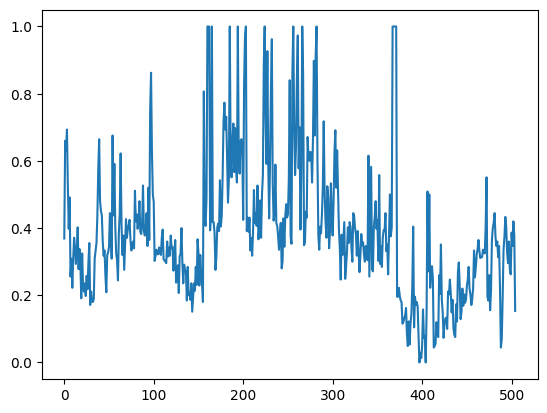

In [41]:
plt.plot(y)

In [42]:
forecast = []
for i in range(len(y)):
  forecast.append(model.predict(x[i][np.newaxis]))

1/1 [==============================] - 0s 18ms/step


In [43]:
t1 = x[np.argmax(np.transpose(x)[0])]
t2 = x[np.argmax(np.transpose(x)[1])]
t3 = x[np.argmax(np.transpose(x)[2])]
t4 = x[np.argmax(np.transpose(x)[3])]
t5 = x[np.argmax(np.transpose(x)[4])]
t6 = x[np.argmax(np.transpose(x)[5])]
t7 = x[np.argmax(np.transpose(x)[6])]
t8 = x[np.argmax(np.transpose(x)[7])]
t9 = x[np.argmax(np.transpose(x)[8])]
t10 = x[np.argmax(np.transpose(x)[9])]
t11 = x[np.argmax(np.transpose(x)[10])]
t12 = x[np.argmax(np.transpose(x)[11])]
t13 = x[np.argmax(np.transpose(x)[12])]

In [44]:
forecast

[array([[0.42107427]], dtype=float32),
 array([[0.43445778]], dtype=float32),
 array([[0.435431]], dtype=float32),
 array([[0.434171]], dtype=float32),
 array([[0.42679214]], dtype=float32),
 array([[0.41100967]], dtype=float32),
 array([[0.40446958]], dtype=float32),
 array([[0.38487142]], dtype=float32),
 array([[0.40444165]], dtype=float32),
 array([[0.4044548]], dtype=float32),
 array([[0.41040078]], dtype=float32),
 array([[0.40544438]], dtype=float32),
 array([[0.4011547]], dtype=float32),
 array([[0.39745578]], dtype=float32),
 array([[0.399546]], dtype=float32),
 array([[0.40167218]], dtype=float32),
 array([[0.39185283]], dtype=float32),
 array([[0.37708572]], dtype=float32),
 array([[0.39387372]], dtype=float32),
 array([[0.3779815]], dtype=float32),
 array([[0.39312544]], dtype=float32),
 array([[0.389248]], dtype=float32),
 array([[0.384447]], dtype=float32),
 array([[0.39021543]], dtype=float32),
 array([[0.37444875]], dtype=float32),
 array([[0.38882852]], dtype=float32),

In [45]:
import matplotlib.pyplot as plt

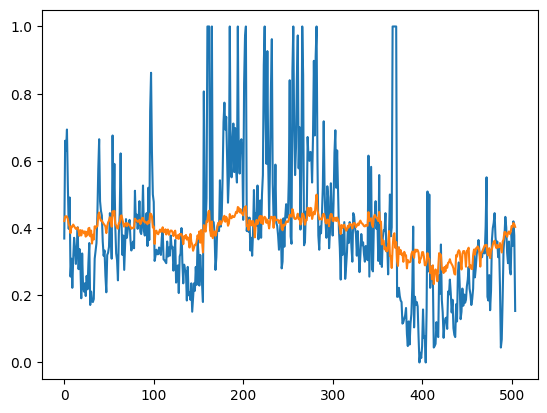

In [46]:
plt.plot(np.arange(505),y)
plt.plot(np.arange(505),np.array(forecast).reshape(505))

In [47]:
y

array([0.36888888, 0.66      , 0.6311111 , 0.6933333 , 0.52666664,
       0.39777777, 0.4911111 , 0.25555557, 0.30888888, 0.22222222,
       0.30888888, 0.37111112, 0.3422222 , 0.29333332, 0.3311111 ,
       0.40222222, 0.2777778 , 0.33777776, 0.29333332, 0.19111112,
       0.32444444, 0.22666667, 0.21111111, 0.23555556, 0.19777778,
       0.25777778, 0.21777777, 0.29777777, 0.35555556, 0.1711111 ,
       0.21111111, 0.18222222, 0.18      , 0.18888889, 0.30888888,
       0.33333334, 0.35555556, 0.4377778 , 0.5733333 , 0.66444445,
       0.48      , 0.4511111 , 0.4377778 , 0.36      , 0.31777778,
       0.33333334, 0.25777778, 0.20888889, 0.32      , 0.32666665,
       0.34444445, 0.44444445, 0.40888888, 0.30888888, 0.6755555 ,
       0.4377778 , 0.5911111 , 0.40666667, 0.32444444, 0.30444443,
       0.24444444, 0.38222224, 0.44444445, 0.62222224, 0.41111112,
       0.32      , 0.37777779, 0.27555555, 0.35333332, 0.42666668,
       0.37111112, 0.39555556, 0.40888888, 0.42444444, 0.36444